In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [53]:
dengue.dtypes

Month                   category
Year              datetime64[ns]
Region                    object
Dengue_Cases               int64
Dengue_Deaths              int64
Mortality_Rate           float64
dtype: object

In [54]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016-01-01,Region I,705,1,0.14
1,February,2016-01-01,Region I,374,0,0.00
2,March,2016-01-01,Region I,276,0,0.00
3,April,2016-01-01,Region I,240,2,0.83
4,May,2016-01-01,Region I,243,1,0.41
...,...,...,...,...,...,...
1015,August,2020-01-01,BARMM,91,0,0.00
1016,September,2020-01-01,BARMM,16,8,50.00
1017,October,2020-01-01,BARMM,13,9,69.23
1018,November,2020-01-01,BARMM,15,1,6.67


In [52]:
dengue.drop(columns = 'MortalityRate', inplace=True)

<h1> BAR PLOT </h1>

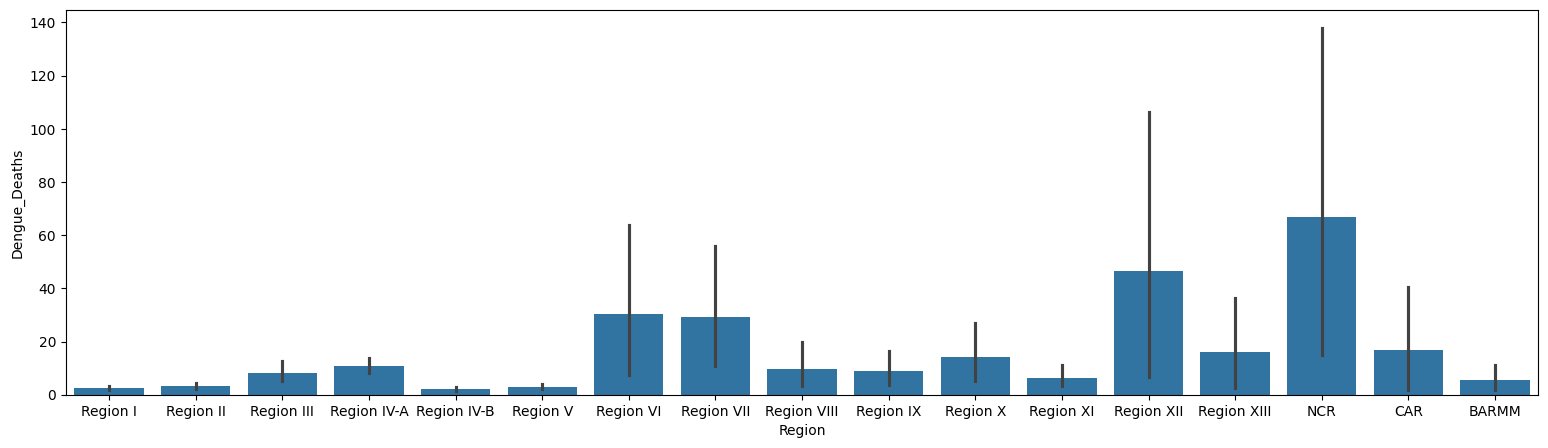

In [49]:
sns.barplot(data=dengue, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 5) 
plt.show()

<h1> LINE PLOT </h1>

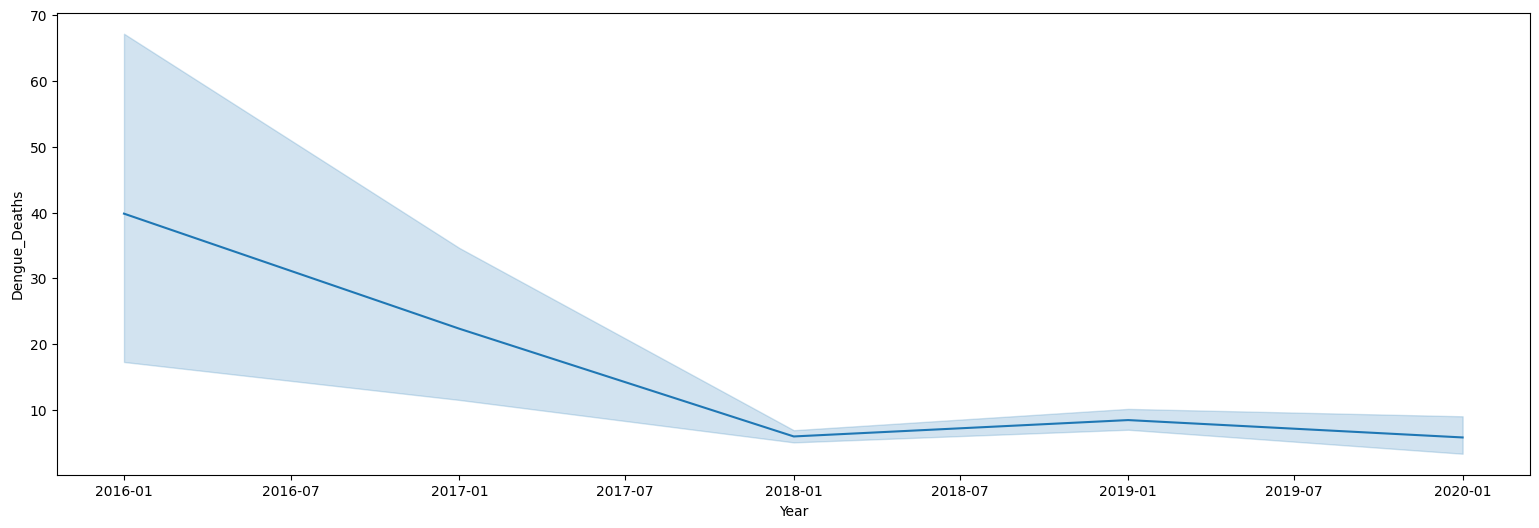

In [58]:
sns.lineplot(data=dengue, y="Dengue_Deaths", x="Year")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Scatter Plot </h1>

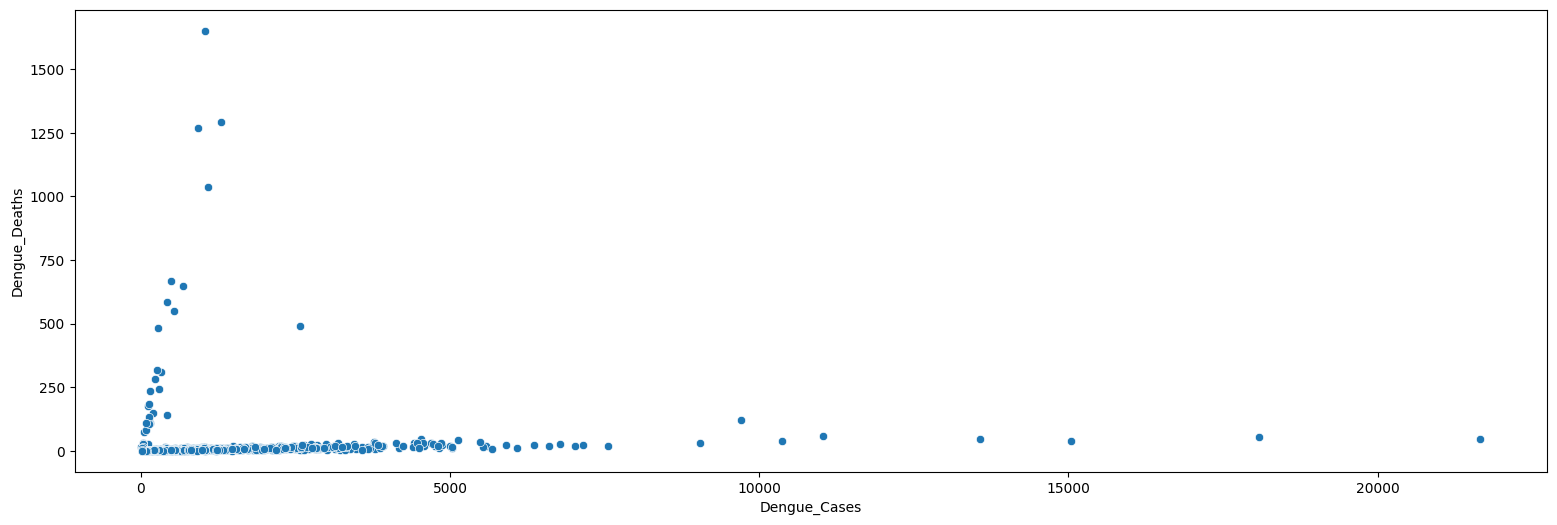

In [60]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases")
plt.gcf().set_size_inches(19, 6)
plt.show()

<h1>Box Plot </h1>

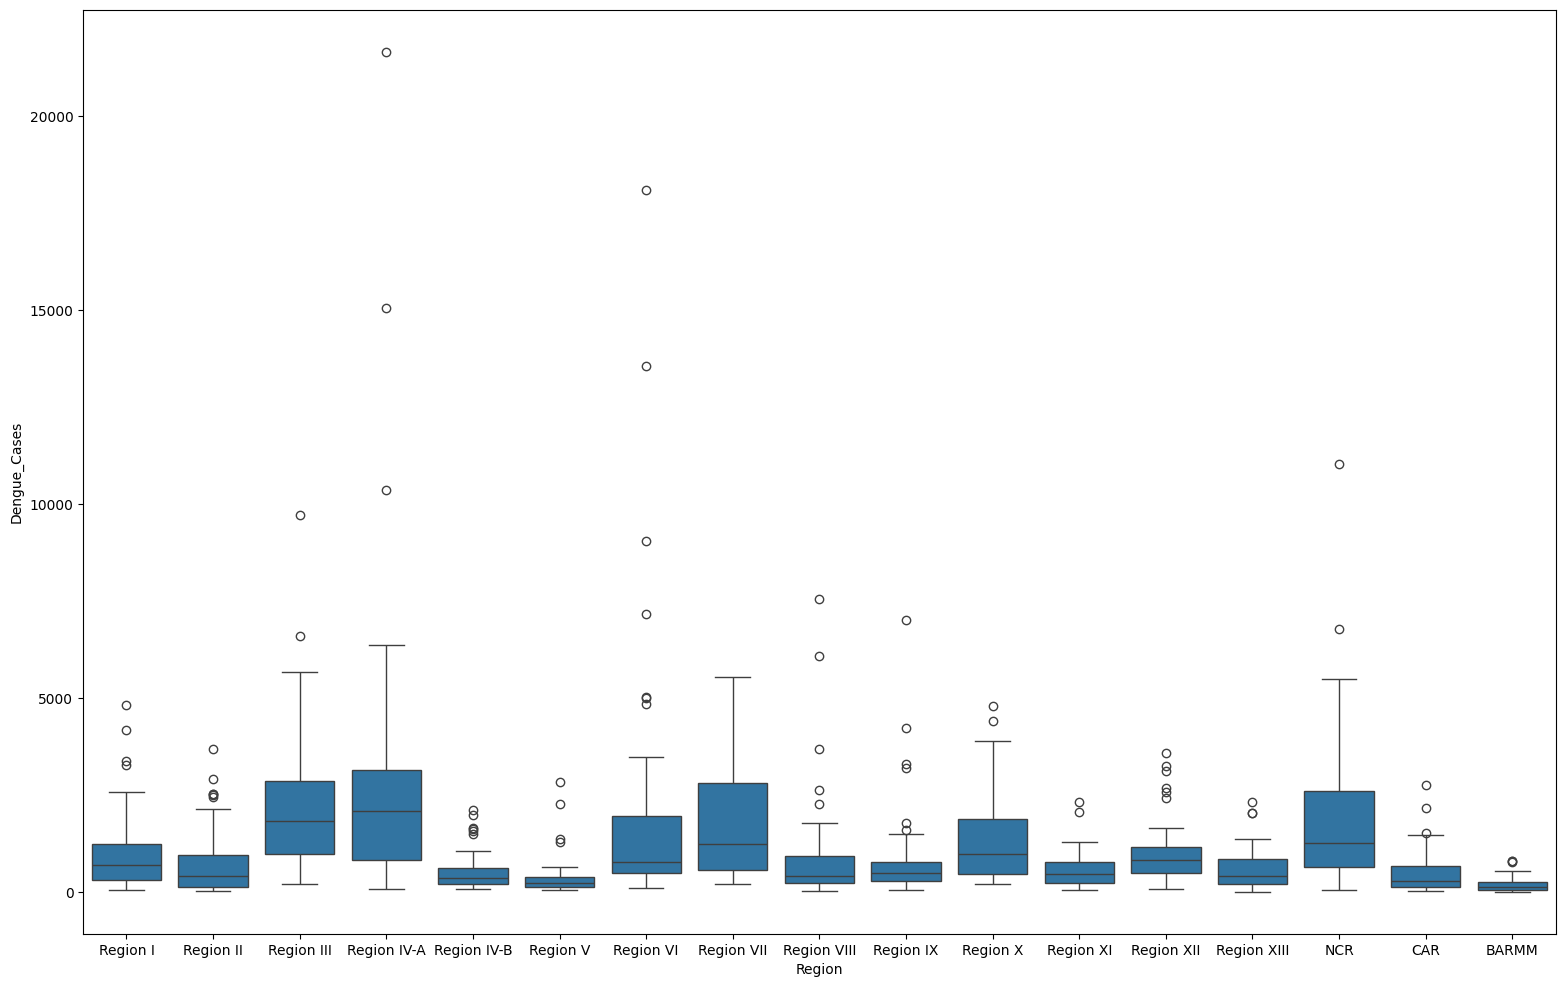

In [62]:
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

In [69]:
dengue_V2 = dengue[dengue["Year"] != '2019-01-01']

In [70]:
dengue_V2

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016-01-01,Region I,705,1,0.14
1,February,2016-01-01,Region I,374,0,0.00
2,March,2016-01-01,Region I,276,0,0.00
3,April,2016-01-01,Region I,240,2,0.83
4,May,2016-01-01,Region I,243,1,0.41
...,...,...,...,...,...,...
1015,August,2020-01-01,BARMM,91,0,0.00
1016,September,2020-01-01,BARMM,16,8,50.00
1017,October,2020-01-01,BARMM,13,9,69.23
1018,November,2020-01-01,BARMM,15,1,6.67


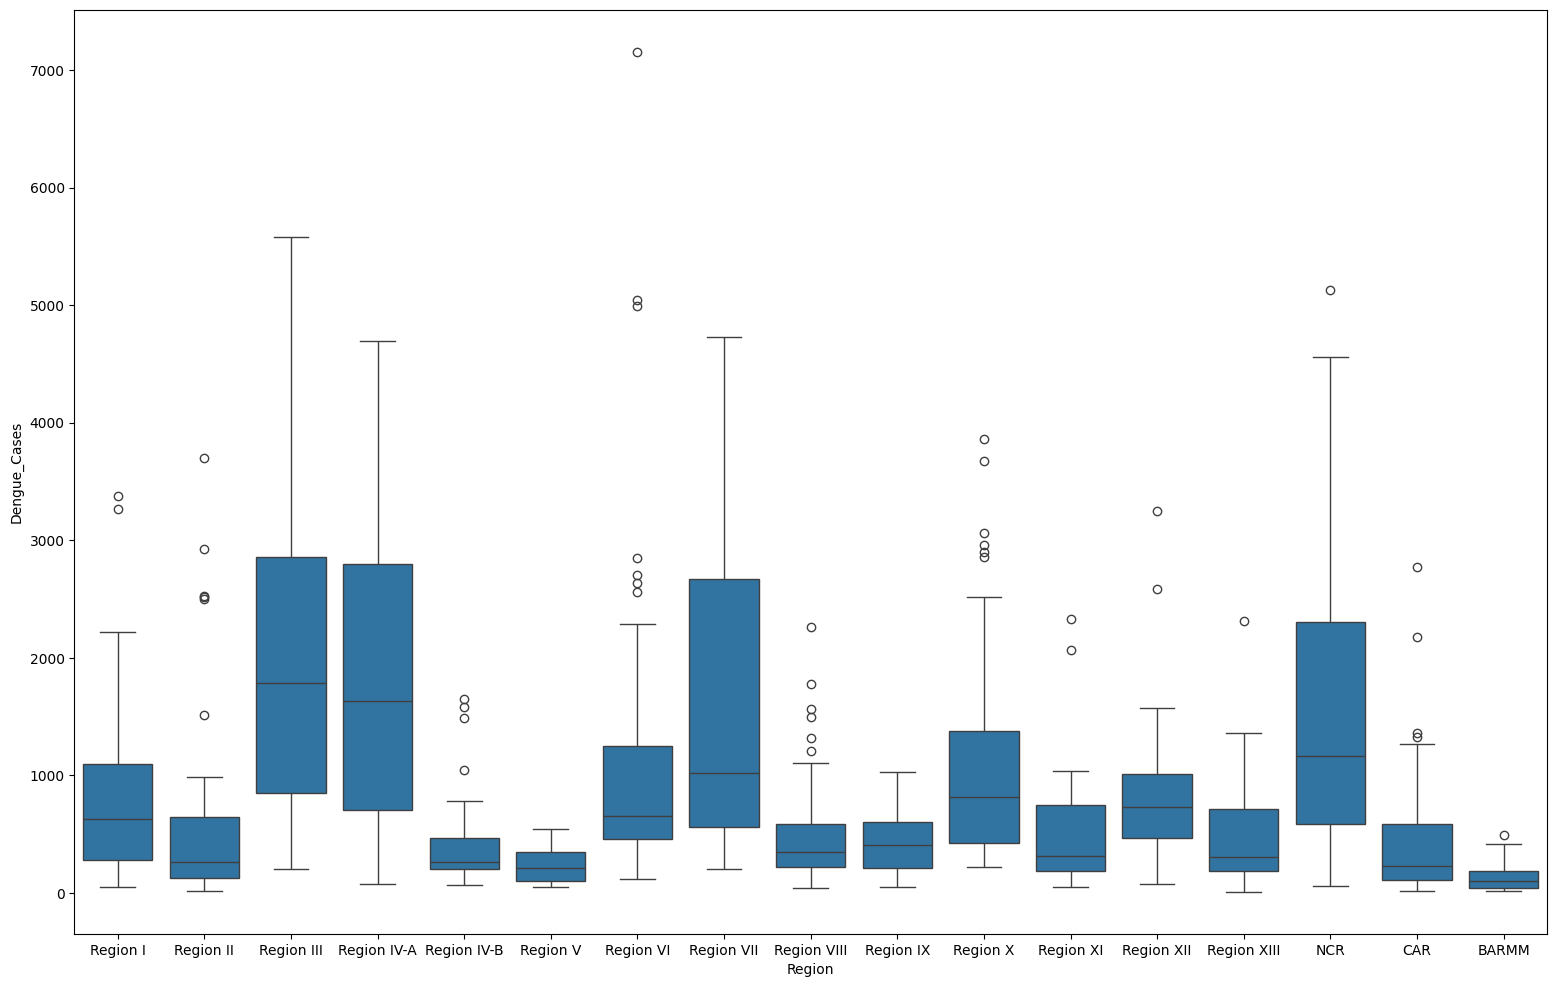

In [71]:
sns.boxplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

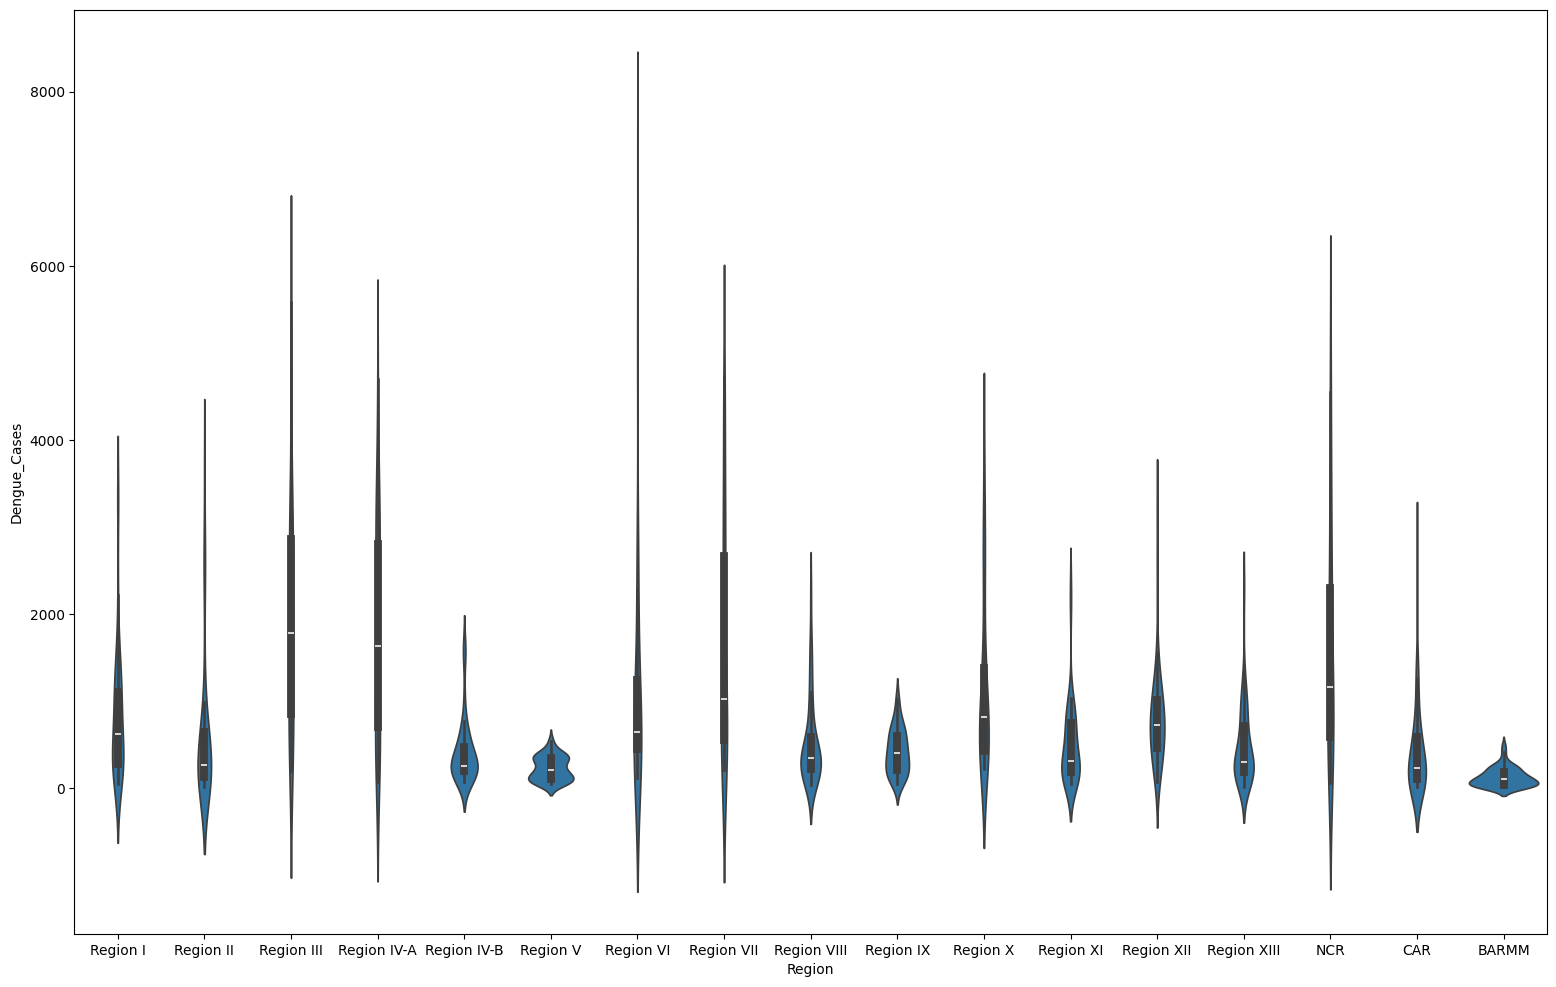

In [72]:
sns.violinplot(data=dengue_V2, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 12)
plt.show()

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

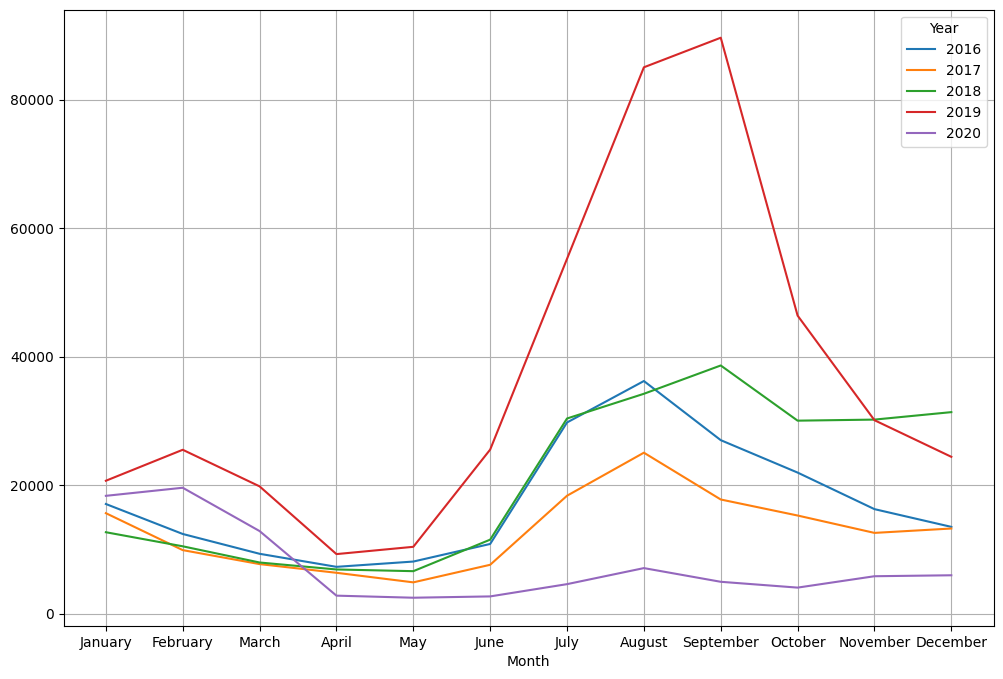

In [6]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

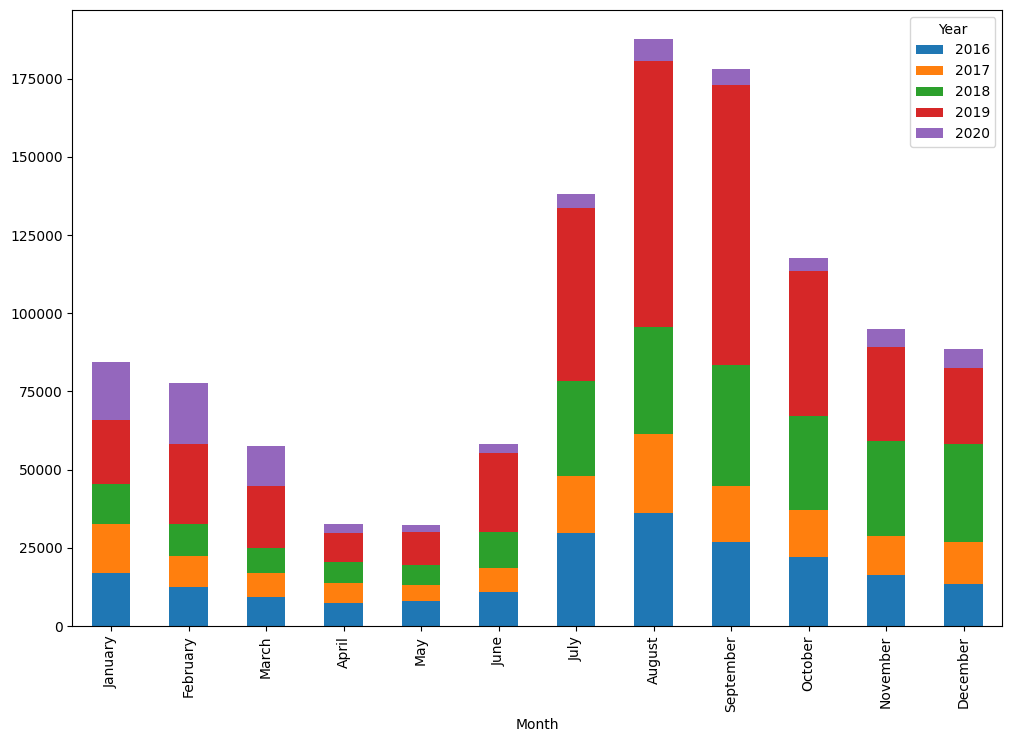

In [7]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [23]:
Regional_Death = dengue.groupby(["Region"])

In [25]:
Regional_Death = dengue.groupby(["Region"])[["Dengue_Cases", "Dengue_Deaths"]].sum()

In [26]:
Regional_Death

,Dengue_Cases,Dengue_Deaths
Region,,
BARMM,11537,332
CAR,30582,1008
NCR,115966,4008
Region I,59066,157
Region II,45141,193
Region III,131064,482
Region IV-A,163029,652
Region IV-B,30849,130
Region IX,47781,532


In [27]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [28]:
Regional_Death

,Dengue_Cases,Dengue_Deaths,Mortality_Rate
Region,,,
BARMM,11537,332,2.88
CAR,30582,1008,3.30
NCR,115966,4008,3.46
Region I,59066,157,0.27
Region II,45141,193,0.43
Region III,131064,482,0.37
Region IV-A,163029,652,0.40
Region IV-B,30849,130,0.42
Region IX,47781,532,1.11


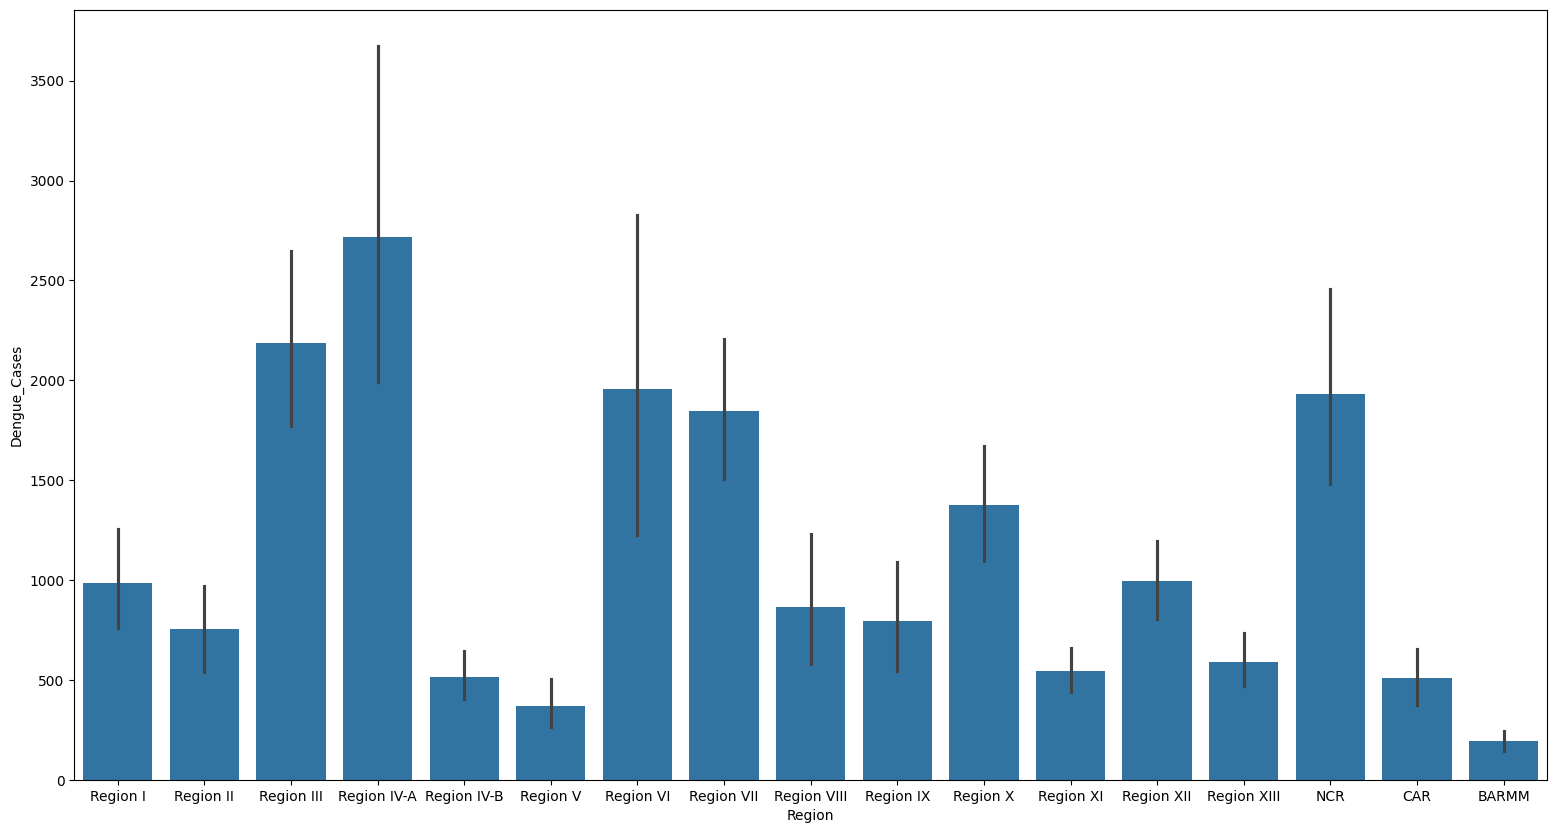

In [8]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

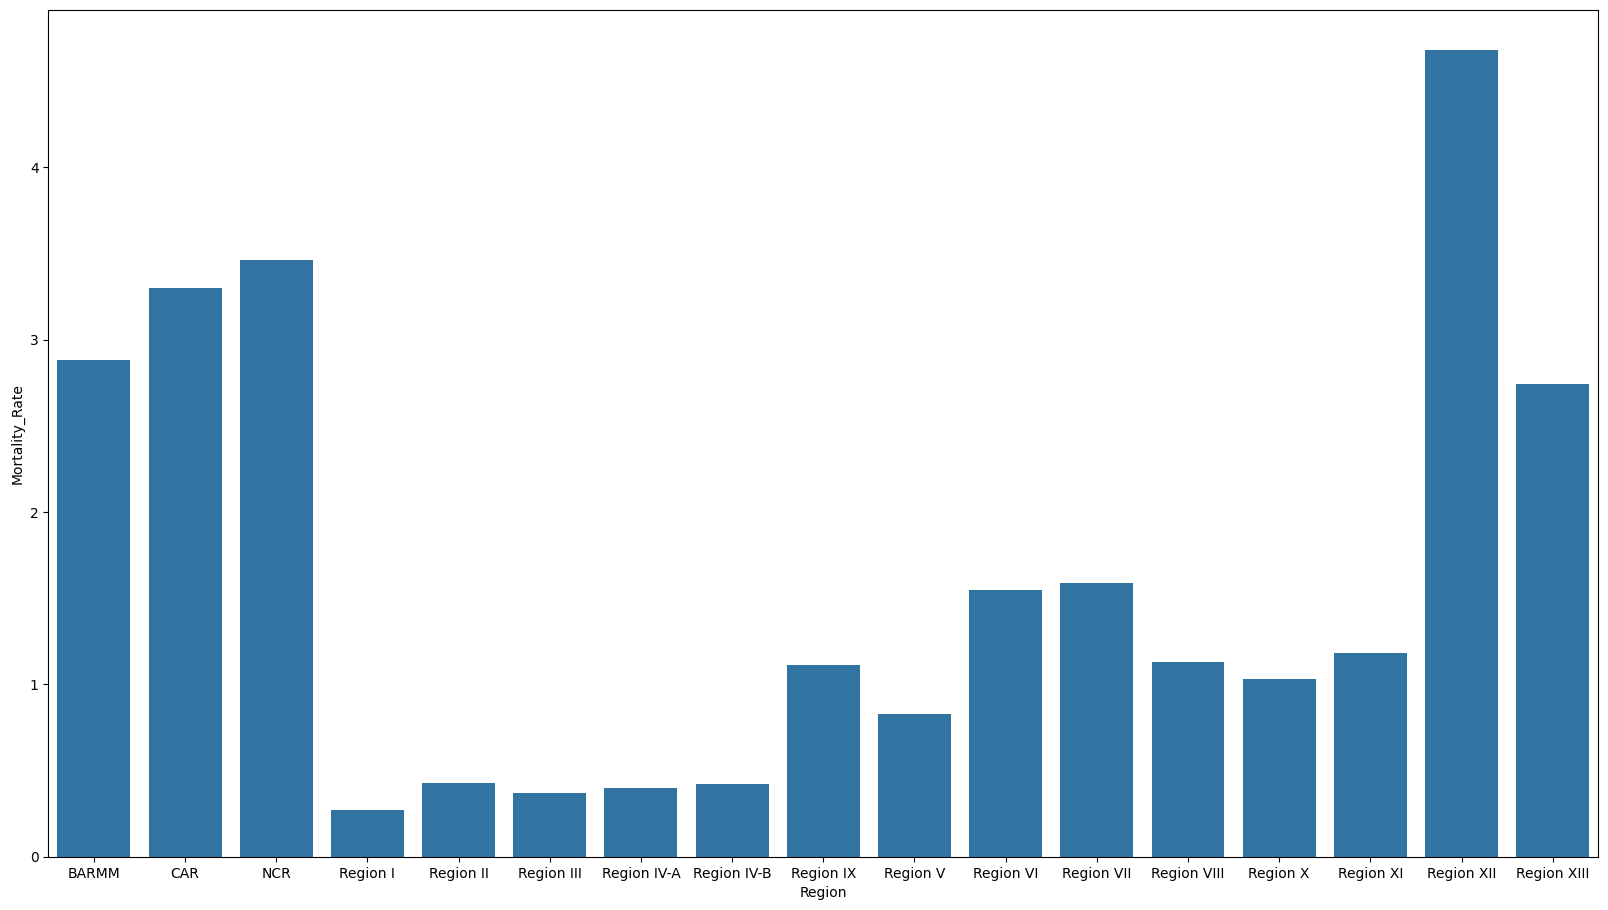

In [29]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

In [35]:
# Convert 'Year' column to datetime dtype
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

# Group the data by region and year
reg_death_yr = dengue.groupby([dengue['Region'], dengue['Year'].dt.year])
# # # Calculate mortality rate
# reg_death_yr["Mortality_Rate"] = (reg_death_yr["Dengue_Deaths"] / reg_death_yr["Dengue_Cases"]) * 100

# # # Display the mortality rate per region and year
# print(reg_death_yr[["Dengue_Cases", "Dengue_Deaths", "Mortality_Rate"]])


In [41]:
dengue['Mortality_Rate'] = np.round(((dengue['Dengue_Deaths'] / dengue['Dengue_Cases'])* 100), 2)

In [42]:
dengue.isnull().sum()

Month             0
Year              0
Region            0
Dengue_Cases      0
Dengue_Deaths     0
MortalityRate     0
Mortality_Rate    0
dtype: int64

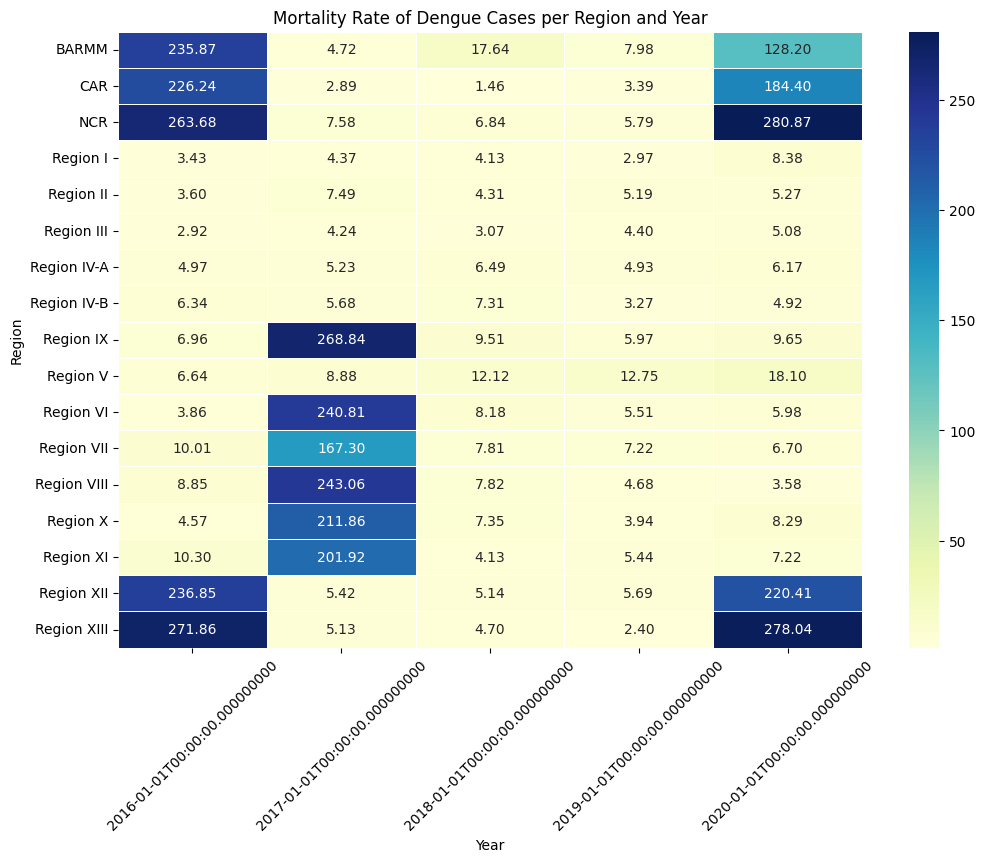

In [43]:
death_per_region = dengue.groupby(["Region", "Year"])["Mortality_Rate"].sum().reset_index()

death_per_region = death_per_region.pivot(index="Region", columns="Year", values="Mortality_Rate")
death_per_region = death_per_region.fillna(0)  # Replace NaN with 0
death_per_region = death_per_region.apply(pd.to_numeric, errors='coerce')

# # Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(death_per_region, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mortality Rate of Dengue Cases per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVE ANALYTICS </h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


In [ ]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


In [12]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

In [13]:
dengue_NCR = dengue.groupby([{dengue[dengue["Region"]=="NCR"],["Dengue_Deaths"]}]).sum()

TypeError: unhashable type: 'DataFrame'

In [14]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [15]:
dengue_NCR

Region
NCR    115966
Name: Dengue_Cases, dtype: int64

In [16]:
dengue["Region"]=="NCR"

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Region, Length: 1020, dtype: bool

In [17]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016-01-01,Region I,705,1
1,February,2016-01-01,Region I,374,0
2,March,2016-01-01,Region I,276,0
3,April,2016-01-01,Region I,240,2
4,May,2016-01-01,Region I,243,1
...,...,...,...,...,...
1015,August,2020-01-01,BARMM,91,0
1016,September,2020-01-01,BARMM,16,8
1017,October,2020-01-01,BARMM,13,9
1018,November,2020-01-01,BARMM,15,1


In [18]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()


In [19]:
dengue_NCR_2016

np.int64(13002)

In [20]:
dengue["Year"] == "2016"

0        True
1        True
2        True
3        True
4        True
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Year, Length: 1020, dtype: bool